# Sentiment Analysis on movie reviews


Student Name:  James Antony Das

Course: Project: NLP


**Table of Content**

1. Getting Started
2. Exploratory Data Analysis
3. Preprocessing
4. Word Embeddings
5. Experimenting with Different models
6. Final Model
7. Hyper paramter tuning
7. Model Evaluation
8. Bussiness Recommendation
9. Conclusion

**Introduction**

The goal of the project is to develop a sentiment analysis system that can process movie reivews and classify them as positive or negative. This is a binary classification task. In this project, we will peform data preprocessing, and try several word and sentence embedding techniques.

Finally, we will compare several machine learning models including deep neural network. Finally the performance and generalization of the model is tested on completely different dataset, and the results are presented in the project report.

## 1. Getting Started

Let's import the necessary libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


downlading nltk packages

In [2]:
# nltk packages
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

**Preparing dataset**

Untar the given tar file with following code, if necessary

In [ ]:
!tar -zxvf '/content/drive/MyDrive/NLP_IU_Proj/review_polarity.tar.gz'

Let's write a function to build csv from text files

In [ ]:
import os
import pandas as pd


def loading_csv_from_dir(directory, label):
    """function for generating csv dataset from text files"""

    texts = []

    # iterating over the files
    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            filepath = os.path.join(directory, filename)
            with open(filepath, 'r', encoding='utf-8') as f:
                try:
                    text = f.read()
                    texts.append(text)
                except ValueError:
                    print(f"Error processing file: {filename}")

    # generating the dataframe
    df = pd.DataFrame({'text': texts, 'label':label})
    return df

Building the dataframe

In [ ]:
# generating and saving dataframe
df_train_neg = loading_csv_from_dir('txt_sentoken/neg', 'negative')
df_train_pos = loading_csv_from_dir('txt_sentoken/pos', 'positive')
df_train = pd.concat([df_train_neg, df_train_pos], ignore_index=True)
df_train.to_csv('sent_train_reviews.csv', index=False)

In [ ]:
# loading the generated dataframe
df_train = pd.read_csv('sent_train_reviews.csv')

**Shape of the dataframe**

In [ ]:
df_train.shape

(2000, 2)

**Observation**
* There are 2000 rows and 2 columns

**Checking for missing values**

In [ ]:
# missing values
df_train.isnull().sum()

,0
id,0
text,0
score,0
label,0


* there are no missing value in the dataframe

**Checking for duplicated entries**

In [ ]:
# duplicate entries
df_train.duplicated().sum()

0

* There are no duplicated entries in the dataframe

**Top five rows of the dataframe**

In [ ]:
df_train.head()

,text,label
0,sometimes a stellar cast can compensate for a ...,negative
1,"plot : set in the future , a courier has uploa...",negative
2,"one night , during a torrential downpour that ...",negative
3,"susan granger's review of "" the musketeer "" ( ...",negative
4,"the ads make "" hanging up "" seem like an upbea...",negative


## 2. Expolaratory Data Analysis

Visualizing barplot of target variable

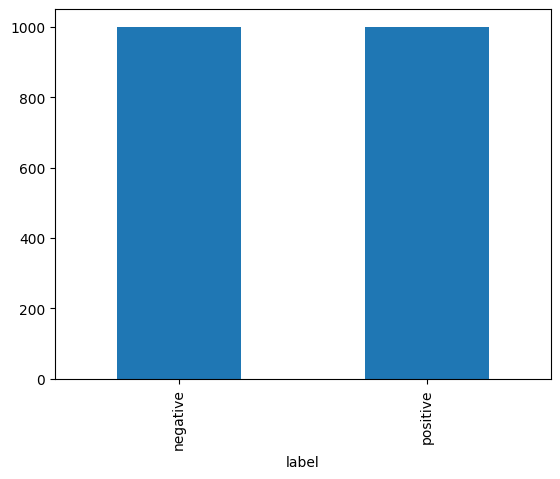

In [ ]:
df_train.label.value_counts().plot(kind='bar');

**Observation**
* There are 1000 positive and 1000 negative entries
* The target varaible is balanced

**WordCloud**

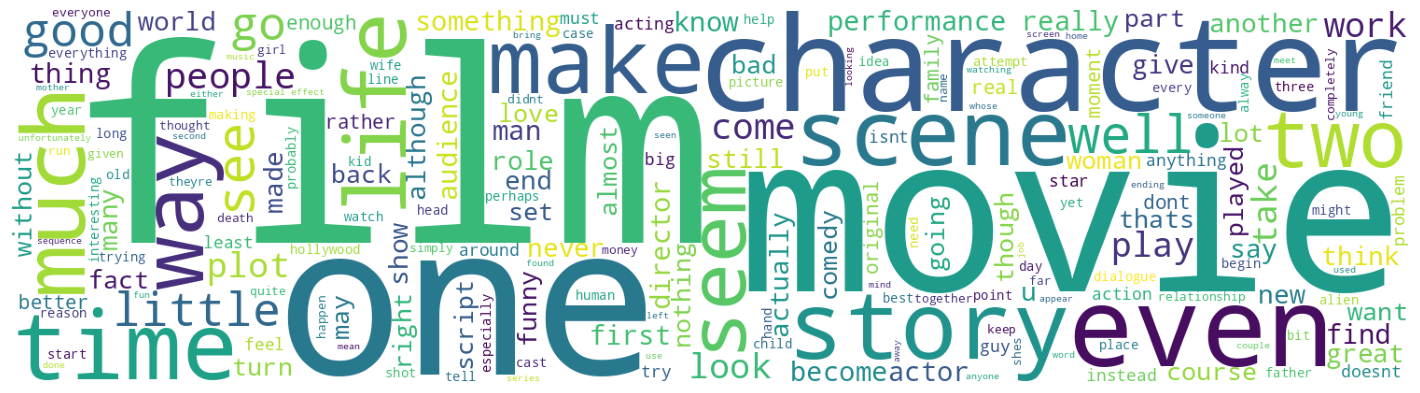

In [ ]:
from wordcloud import WordCloud, STOPWORDS

# Text to generate word cloud from
text = ''.join(df_train.text.values)


# Create a WordCloud object
wordcloud = WordCloud(width=1500, height=400,
                      background_color='white', stopwords=STOPWORDS,
                      min_font_size=10
                      ).generate(text)


# Display the generated image:
plt.figure(figsize=(14, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

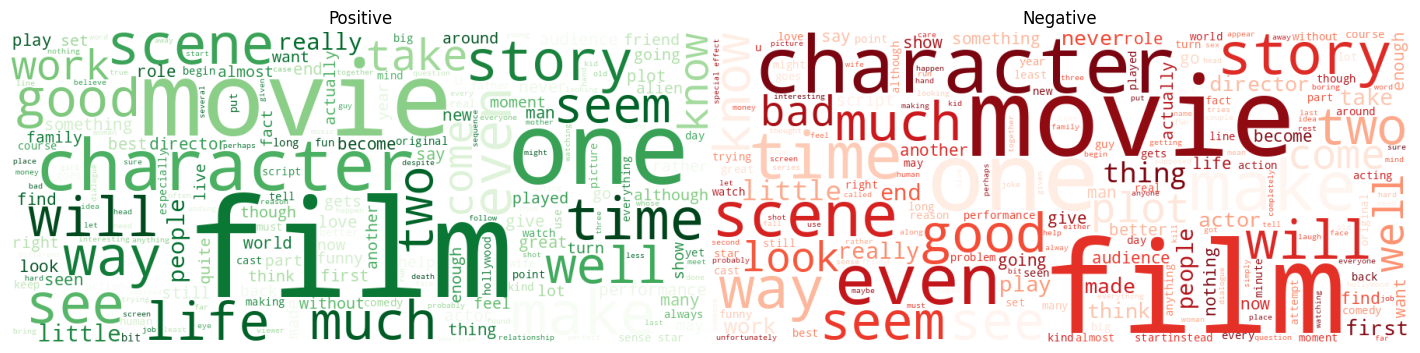

In [ ]:
from wordcloud import WordCloud, STOPWORDS

fig, axes = plt.subplots(1, 2, figsize=(14, 8), facecolor=None)


# Text to generate word cloud from
text_p = ''.join(df_train[df_train.label == 'positive'].text.values)
text_n = ''.join(df_train[df_train.label == 'negative'].text.values)


# Create a WordCloud object
wordcloudp = WordCloud(width=900, height=400,
                       background_color='white', stopwords=STOPWORDS,
                       min_font_size=10, colormap = 'Greens'
                       ).generate(text_p)


# Create a WordCloud object
wordcloudn = WordCloud(width=900, height=400,
                       background_color='white', stopwords=STOPWORDS,
                       min_font_size=10, colormap = 'Reds'
                       ).generate(text_n)


# plotting the graph
axes[0].imshow(wordcloudp)
axes[0].axis("off")
axes[0].set_title('Positive')
axes[1].imshow(wordcloudn)
axes[1].axis("off")
axes[1].set_title('Negative')
plt.tight_layout(pad=0)
plt.show()

**Observation**
* Most used words includes 'film', 'movie', 'character', 'one', etc.
* There is no noticable difference between the word distributions
* Machine learning algorithms are good at identifying statistical patterns in this case

## 3. Preprocessing and Data Cleanup

Let's write a function to clean the data using Regex

In [ ]:
import re
import string


def clean_text(text):
    """A function to remove punctuations, html tags, links, numbers, etc."""

    # converts string to lower case
    text = str(text).lower()
    # removing @usernames if any
    text = re.sub(r'@\w+', '', text)
    # removing text inside square brackets
    text = re.sub('\[.*?\]', '', text)
    # removing the links
    text = re.sub('https?://\S+|www\.\S+', '', text)
    # removing the html tags
    text = re.sub('<.*?>+', '', text)
    # removing the punctuations
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # removing all new lines
    text = re.sub('\n', '', text)
    # removing the numbers inside strings
    text = re.sub('\w*\d\w*', '', text)
    return text


Cleaning the text

In [ ]:
df_train['processed_text'] = df_train.text.apply(lambda x : clean_text(x))

Original text Vs text after data cleaning

In [ ]:
df_train.head()

,text,label,processed_text
0,sometimes a stellar cast can compensate for a ...,negative,sometimes a stellar cast can compensate for a ...
1,"plot : set in the future , a courier has uploa...",negative,plot set in the future a courier has uploade...
2,"one night , during a torrential downpour that ...",negative,one night during a torrential downpour that f...
3,"susan granger's review of "" the musketeer "" ( ...",negative,susan grangers review of the musketeer univ...
4,"the ads make "" hanging up "" seem like an upbea...",negative,the ads make hanging up seem like an upbeat ...


## Removing Stop words

Let's write a function to remove the stopwords from the text

In [ ]:
from nltk.corpus import stopwords

def remove_stopwords(text):
  """Function for removing stopwords"""
  text = " ".join([word for word in text.split() if word not in stopwords.words('english')])
  return text

Removing stop words

In [ ]:
df_train.processed_text = df_train.processed_text.apply(lambda x : remove_stopwords(x))

Original text Vs Text after removing stop words

In [ ]:
df_train.head()

,text,label,processed_text
0,sometimes a stellar cast can compensate for a ...,negative,sometimes stellar cast compensate lot things p...
1,"plot : set in the future , a courier has uploa...",negative,plot set future courier uploaded data hard dri...
2,"one night , during a torrential downpour that ...",negative,one night torrential downpour flooded streets ...
3,"susan granger's review of "" the musketeer "" ( ...",negative,susan grangers review musketeer universal pict...
4,"the ads make "" hanging up "" seem like an upbea...",negative,ads make hanging seem like upbeat comedy rasca...


## Word Lemmatization

Let's write a function for word lemmatization

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

def lemmatize_text(text):
  """function for lemmatization"""
  lemmatizer = WordNetLemmatizer()
  words = nltk.word_tokenize(text)
  lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
  return ' '.join(lemmatized_words)

Applying the Lemmatization function

In [ ]:
df_train.processed_text = df_train.processed_text.apply(lambda x : lemmatize_text(x))

Original text Vs text after Lemmatization

In [ ]:
df_train.head()

,text,label,processed_text
0,sometimes a stellar cast can compensate for a ...,negative,sometimes stellar cast compensate lot thing pu...
1,"plot : set in the future , a courier has uploa...",negative,plot set future courier uploaded data hard dri...
2,"one night , during a torrential downpour that ...",negative,one night torrential downpour flooded street w...
3,"susan granger's review of "" the musketeer "" ( ...",negative,susan granger review musketeer universal pictu...
4,"the ads make "" hanging up "" seem like an upbea...",negative,ad make hanging seem like upbeat comedy rascal...


## Finding the number of unique words

In [ ]:
def tokenize_text(text):
  """Returns tokenized text"""
  tokens = word_tokenize(text)
  return tokens


# calculating the unique word count
dn = df_train.text.apply(lambda x : tokenize_text(x))
unique_words = set(word for sublist in dn for word in sublist)
num_unique_words = len(unique_words)
print("unique words:", num_unique_words)

unique words: 46462


**Observation**
* There are 46,462 words in the given Corpus

# Word Embeddings

Let's write a function to visualizie

In [ ]:
from sklearn.decomposition import TruncatedSVD, PCA
import matplotlib.patches as mpatches
import matplotlib
from mpl_toolkits import mplot3d


def visualize_word_embeddings(embeddings):
  """Function for visualizing the generated word embedding in 3d"""

  # Create a 3D figure and axes
  fig = plt.figure(figsize=(10, 8))
  ax = plt.axes(111, projection='3d')

  # PCA
  emb = embeddings.copy()
  decom = PCA(n_components=3)
  decom.fit(emb)
  emb2 = decom.transform(emb)
  emt = pd.DataFrame()
  emt['x'] = emb2[:, 0]
  emt['y'] = emb2[:, 1]
  emt['z'] = emb2[:, 2]

  # plotting the embeddings
  ax.scatter(emt['x'], emt['y'], emt['z'], c=df_train['label'].map({'positive': 1, 'negative': 0}), alpha=.8,
             cmap=matplotlib.colors.ListedColormap(['blue', 'orange',]))
  blue_patch = mpatches.Patch(color='blue', label='positive')
  orange_patch = mpatches.Patch(color='orange', label='negative')
  plt.legend(handles=[blue_patch, orange_patch])
  plt.show()

In [ ]:
def cumulative_variance_explained(pca, n):
  """ A function for finding the cumulative variance explained by n components """

  plt.figure(figsize = (15, 5))
  components = np.arange(1, n, step=1)
  variance = np.cumsum(pca.explained_variance_ratio_)
  plt.ylim(0.0,1.1)
  # plotting the graph
  plt.plot(components, variance, marker='o', linestyle='--', color='green')
  plt.bar(components, pca.explained_variance_ratio_, alpha=0.5, align='center')
  plt.xlabel('Number of Components')
  plt.xticks(np.arange(1, n, step=5))
  plt.ylabel('Cumulative variance')
  plt.title('The number of components needed to explain variance')
  return plt

### Word2Vec

In [ ]:
from gensim.models import Word2Vec

# Word2Vec model
tokenized_words = [item.split(" ") for item in df_train['processed_text'].values]
word2vec_model = Word2Vec(tokenized_words, vector_size = 300, min_count = 1, window=5, workers = 6)

In [ ]:
def word2vec_embeddings(text):
    """function for generating Word2vec embeddings"""

    word_vectors = []
    # iterating over words
    for word in text.split(" "):
        if word in word2vec_model.wv:
            word_vectors.append(word2vec_model.wv[word])
    if len(word_vectors) > 0:
        return sum(word_vectors) / len(word_vectors)
    else:
        return None

In [ ]:
embeddings_w2v = pd.DataFrame(df_train['processed_text'].apply(word2vec_embeddings).tolist())

In [ ]:
embeddings_w2v.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.017427,0.379252,0.025771,0.025192,0.043178,-0.315286,0.212600,0.597786,0.082825,-0.137471,...,0.109415,0.356546,0.284403,0.093253,0.362268,0.341503,0.081562,-0.245341,0.294506,-0.046119
1,-0.048631,0.440411,-0.005192,-0.009011,-0.006475,-0.406803,0.244948,0.647584,0.096432,-0.163385,...,0.132443,0.409498,0.295925,0.083453,0.389721,0.364914,0.128992,-0.289360,0.354526,-0.084225
2,-0.006956,0.407301,0.026465,0.067758,0.044905,-0.345622,0.236032,0.644473,0.111516,-0.142559,...,0.129788,0.390594,0.316938,0.116468,0.394615,0.351159,0.089788,-0.256380,0.311423,-0.050521
3,0.006750,0.281008,0.014382,0.082056,0.051201,-0.218346,0.188747,0.460752,0.086091,-0.112981,...,0.087700,0.278431,0.233852,0.081949,0.284394,0.270233,0.044094,-0.173280,0.205884,-0.034209
4,-0.001993,0.396048,0.041646,0.068136,0.068060,-0.323740,0.238210,0.654145,0.110992,-0.143971,...,0.128062,0.387637,0.319454,0.114429,0.404891,0.366601,0.074608,-0.251884,0.299259,-0.034710


In [ ]:
embeddings_w2v.shape

(2000, 300)

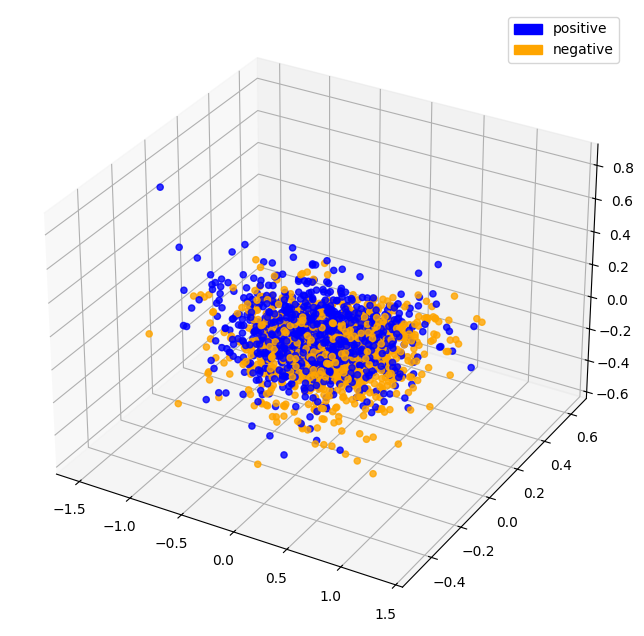

In [ ]:
# 3d embeddings
visualize_word_embeddings(embeddings_w2v)

**Insight**
* Word2Vec embeddigns are not linearly sperable atleast in 3 dimensions

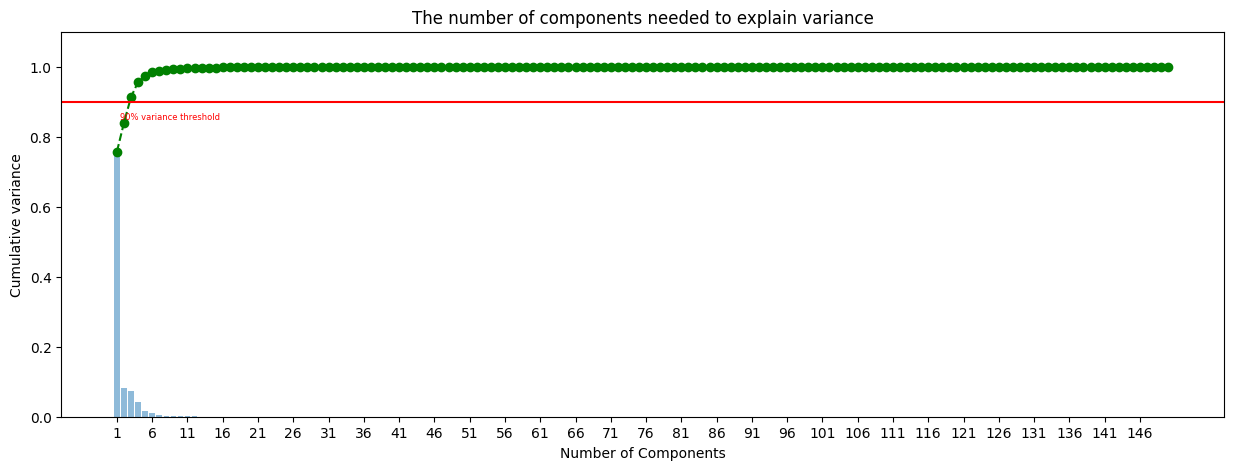

In [ ]:
emb_w2v = embeddings_w2v.copy()
pca3 =  PCA(n_components=150)
pca3.fit(emb_w2v)
cumulative_variance_explained(pca3, n = 151)
# drawing 90% variance threshold line
plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(1.5, 0.85, '90% variance threshold', color = 'red', fontsize=6)
plt.show()

* approximately 10 principle components are enough for explaining maximum variance

In [ ]:
#train test split
from sklearn.model_selection import train_test_split

y = df_train.label.map({'positive': 1, 'negative': 0})
X_train_w2v, X_val_w2v, y_train_w2v, y_val_w2v = train_test_split(embeddings_w2v, y,
                                                                  test_size=0.2, random_state=42)

### Glove

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load pre-trained GloVe embeddings
embeddings_index = {}
with open('/content/drive/MyDrive/NLPproj/glove.6B.100d.txt.word2vec', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

# Create word-to-index mapping
vocab_size = 40000  # Adjust as needed
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(df_train['processed_text'])

# Create embedding matrix
embedding_dim = 100  # Dimension of GloVe embeddings
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    if i < vocab_size:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [ ]:
def glove_embeddings(text):
    """Function for generate embedding matrix"""
    tokens = tokenizer.texts_to_sequences([text])[0]
    word_embeddings = [embedding_matrix[word_index] for word_index in tokens
                       if word_index < vocab_size]
    if word_embeddings:
        return np.mean(word_embeddings, axis=0)
    else:
        return np.zeros(embedding_dim)

In [ ]:
# Apply the function to the DataFrame
embeddings_glove = pd.DataFrame(df_train['processed_text'].apply(glove_embeddings).tolist())

In [ ]:
embeddings_glove.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.021588,0.144383,0.260728,-0.231480,-0.060375,0.176704,-0.140563,0.120375,-0.071570,-0.061425,...,-0.028298,-0.029428,-0.040376,-0.009978,-0.237503,0.010253,-0.140460,-0.124664,0.153031,0.132824
1,-0.004493,0.085940,0.327483,-0.236441,0.017433,0.102207,-0.074009,0.082497,-0.002388,-0.052492,...,-0.031594,-0.040056,-0.021555,0.046775,-0.162280,-0.037405,-0.093738,-0.203459,0.159078,0.124302
2,-0.051477,0.157138,0.266181,-0.271360,-0.038397,0.228729,-0.072890,0.119504,-0.024449,-0.100857,...,0.003875,-0.041209,-0.045026,0.035578,-0.290217,0.000025,-0.133762,-0.079680,0.223162,0.102160
3,0.056611,0.023944,0.124395,-0.102407,0.108841,0.126193,-0.007182,0.041075,-0.197898,-0.029050,...,0.018869,-0.097667,0.034340,0.054573,-0.146305,0.008906,-0.160197,-0.300348,0.116174,0.071708
4,0.008044,0.185875,0.192607,-0.178879,0.002604,0.179657,-0.113111,0.083573,-0.041313,-0.145705,...,0.090273,-0.054534,0.172454,0.049902,-0.342898,-0.014390,-0.150690,-0.265919,0.196802,0.108659


In [ ]:
embeddings_glove.shape

(2000, 100)

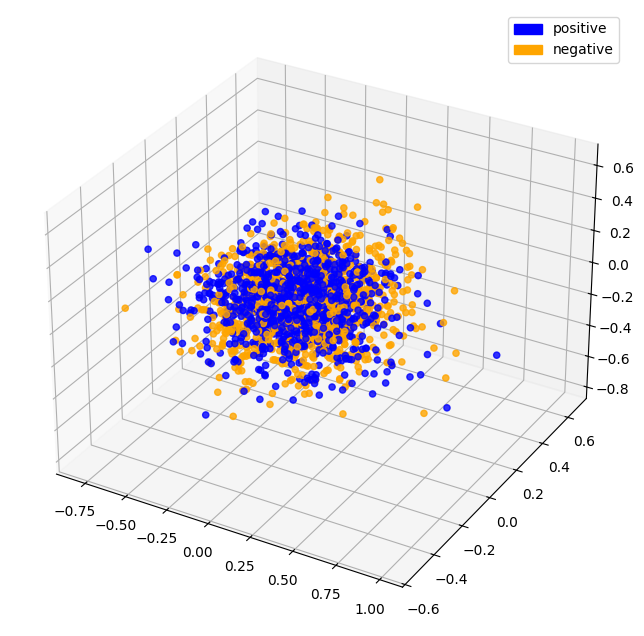

In [ ]:
visualize_word_embeddings(embeddings_glove)

**Insight**
* The glove embeddings are not linearly seperable atleast in 3 dimensions

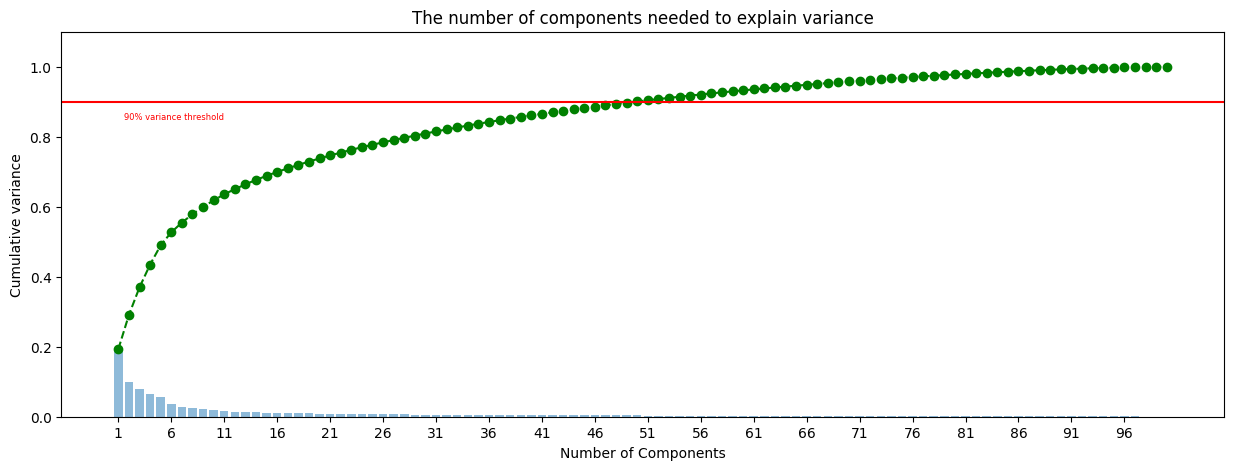

In [ ]:
emb_glove = embeddings_glove.copy()
pca3 =  PCA(n_components=100)
pca3.fit(emb_glove)
cumulative_variance_explained(pca3, n = 101)
# drawing 90% variance threshold line
plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(1.5, 0.85, '90% variance threshold', color = 'red', fontsize=6)
plt.show()

**Insight**
* Approximately 50 principle componetns are needed

In [ ]:
# Train test split
X_train_glove, X_val_glove, y_train_glove, y_val_glove = train_test_split(embeddings_glove, y,
                                                                          test_size=0.2, random_state=42)

### Term Frequency - Inverse Document Frequency (TF-IDF)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def tfidf(data):
    """Function for generating TF-IDF embeddings"""
    tfidf_vectorizer = TfidfVectorizer()
    train_data = tfidf_vectorizer.fit_transform(data)
    return train_data, tfidf_vectorizer

In [ ]:
embeddings_tfidf, tfidf_vectorizer = tfidf(df_train.processed_text)
embeddings_tfidf = pd.DataFrame(embeddings_tfidf.toarray())

In [ ]:
embeddings_tfidf.head()

,0,1,2,3,4,5,6,7,8,9,...,41443,41444,41445,41446,41447,41448,41449,41450,41451,41452
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Insight**
* TF-IDF has produced a huge sparse matrix

In [ ]:
embeddings_tfidf.shape

(2000, 41453)

**Insight**
* There are 41,453 dimensions to the TF-IDF embedding

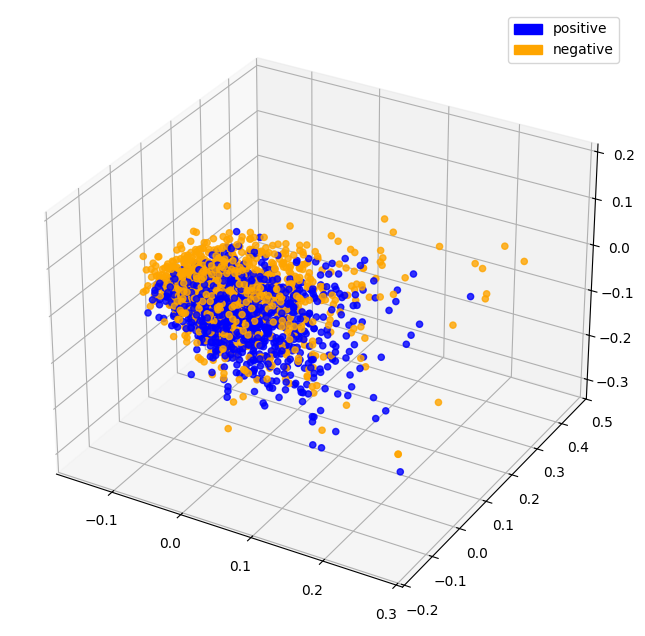

In [ ]:
visualize_word_embeddings(embeddings_tfidf)

**Insight**
* The TF-IDF embeddings are linearly seperable

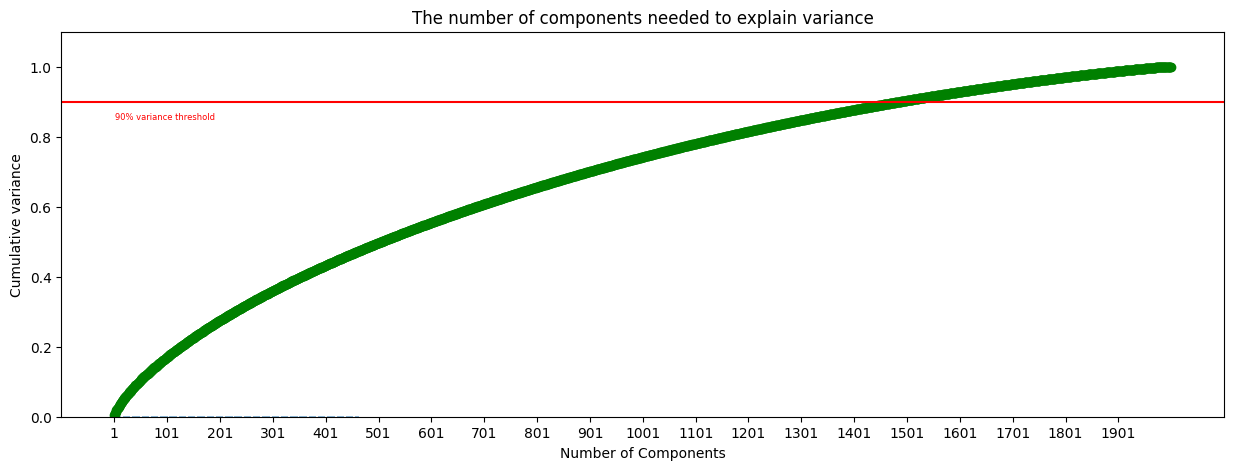

In [ ]:
emb_tfidf = embeddings_tfidf.copy()
pca3 =  PCA(n_components=2000)
pca3.fit(emb_tfidf)
cumulative_variance_explained(pca3, n = 2001)
# drawing 90% variance threshold line
plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(1.5, 0.85, '90% variance threshold', color = 'red', fontsize=6)
plt.xticks(np.arange(1, 2000, step=100))
plt.show()

**Insight**
* More than 1500 components are needed for explaining variance
* Let's chose 150 components to avoid overfitting

In [ ]:
from sklearn.model_selection import train_test_split

# train test split
y = df_train.label.map({'positive': 1, 'negative': 0})
X_train_tfidf, X_val_tfidf, y_train_tfidf, y_val_tfidf = train_test_split(embeddings_tfidf, y,
                                                                          test_size=0.2, random_state=42)

### Sentence Transformers

Sentence embedding with sentence transformers

In [ ]:
from sentence_transformers import SentenceTransformer

# Sentence Transformer Embeddings
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

In [ ]:
# generating sentence embeddings
embeddings_st = pd.DataFrame(model.encode(df_train.processed_text))

In [ ]:
embeddings_st = pd.read_csv('embeddings_st.csv')

Generated embeddings

In [ ]:
embeddings_st.head()

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,0.013327,-0.137773,0.018208,-0.041861,-0.086209,0.072236,0.112206,-0.017421,-0.055339,-0.037929,...,0.000081,0.010896,-0.060467,0.145773,-0.016074,0.047671,0.082668,0.003639,0.011467,-0.082658
1,-0.017554,-0.119915,-0.004672,-0.016471,-0.001838,0.078638,0.022798,-0.004762,-0.010197,-0.046753,...,0.059939,-0.004871,-0.018545,0.128732,-0.028212,0.029479,0.040631,0.046651,0.025518,-0.016975
2,-0.069514,-0.112682,0.037937,0.031406,-0.021097,0.078010,0.055036,-0.018867,-0.029816,-0.083400,...,-0.007693,-0.016736,-0.021748,0.123676,0.056064,-0.019024,0.024618,0.008643,0.006853,-0.035426
3,-0.080291,-0.126133,0.020002,-0.062806,0.002074,0.046268,-0.044161,-0.045556,-0.002940,0.017898,...,-0.036118,0.070673,-0.021510,0.096094,0.053427,-0.050058,0.029985,-0.056807,-0.053894,-0.020903
4,-0.049850,-0.104448,-0.071465,0.030384,0.000852,0.038313,0.020661,0.004421,-0.050367,0.069495,...,-0.068929,-0.021661,-0.001179,0.139696,0.062147,-0.011165,0.083747,-0.046139,0.031587,-0.009460


In [ ]:
embeddings_st.shape

(2000, 384)

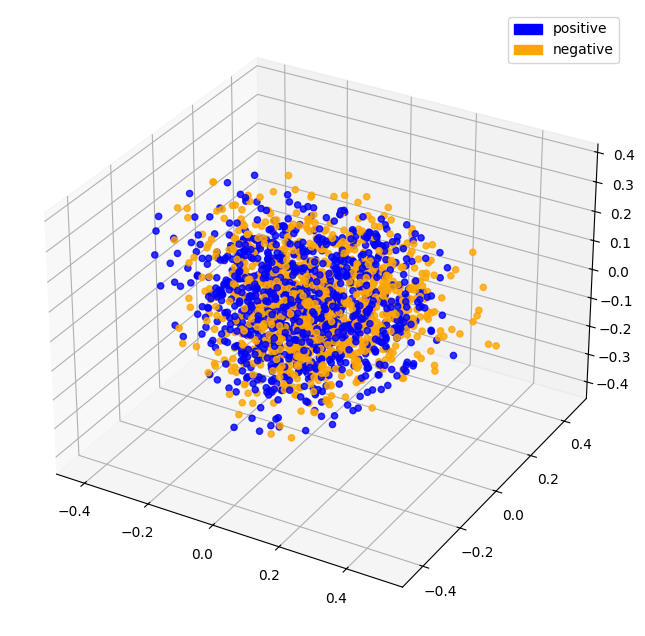

In [ ]:
visualize_word_embeddings(embeddings_st)

**Insight**
* The Sentence embedding is not linearly sperable atleast in 3 dimensions

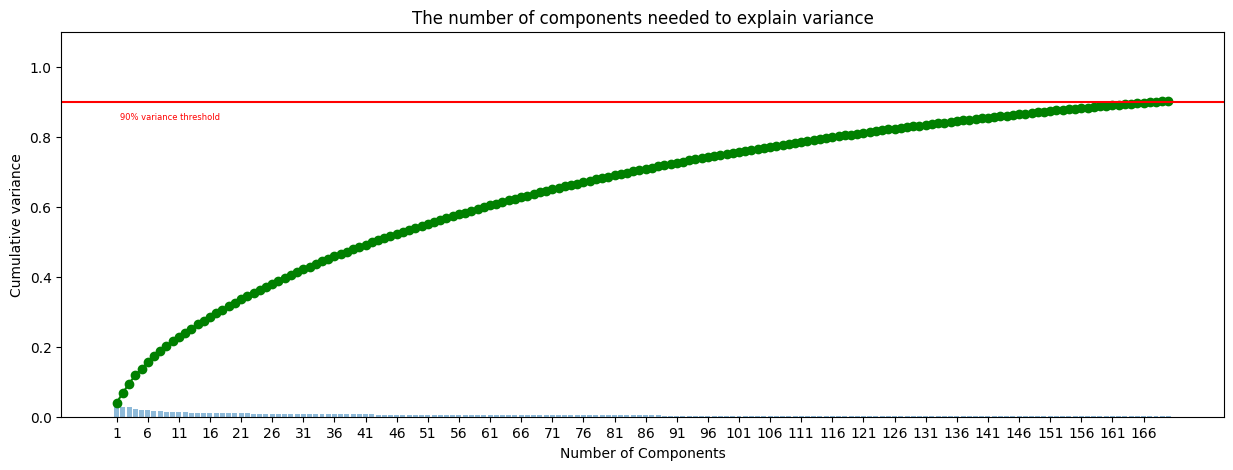

In [ ]:
emb_st = embeddings_st.copy()
pca3 =  PCA(n_components=170)
pca3.fit(emb_st)
cumulative_variance_explained(pca3, n = 171)
# drawing 90% variance threshold line
plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(1.5, 0.85, '90% variance threshold', color = 'red', fontsize=6)
plt.show()

**Insight**
* Around 150 components are necessary for explaining variance

In [ ]:
# train test split
X_train_st, X_val_st, y_train_st, y_val_st = train_test_split(embeddings_st, y,
                                                              test_size=0.2, random_state=42)

**Insight**
* Based on the linear seperability, we can choose **TF-IDF** as the word embedding for our model

## Machine Learning

Let's define some functions

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


def model_eval(model, X_train, y_train, X_test, y_test, average = 'binary'):

  """ Evaluating models based on Training and Testing dataset """

  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)

  df_type = ['Train', 'Test']

  # calculating the accuracy, precision, recall, f1score
  col_acc = [accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)]
  col_pre = [precision_score(y_train, y_pred_train, average = average), precision_score(y_test, y_pred_test, average = average)]
  col_rec = [recall_score(y_train, y_pred_train, average = average), recall_score(y_test, y_pred_test, average = average)]
  col_f1s = [f1_score(y_train, y_pred_train, average = average), f1_score(y_test, y_pred_test, average = average)]

  # building the resultant dataframe
  per_dict = {'Accuracy' : col_acc, 'Precision': col_pre, 'Recall': col_rec, 'F-score': col_f1s}
  per_df = pd.DataFrame(per_dict, index = df_type)

  return per_df

## Model Building

## Support Vector Machine (SVM)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC


svm_tfidf = Pipeline(steps = [('scaling', MinMaxScaler()),
                              ('PCA', PCA(n_components=150)),
                              ('SVM', SVC())])
svm_tfidf.fit(X_train_tfidf, y_train_tfidf)

Pipeline(steps=[('scaling', MinMaxScaler()), ('PCA', PCA(n_components=150)),
                ('SVM', SVC())])

In [ ]:
model_eval(svm_tfidf, X_train_tfidf, y_train_tfidf, X_val_tfidf, y_val_tfidf)

,Accuracy,Precision,Recall,F-score
Train,0.9525,0.951311,0.953692,0.952500
Test,0.8625,0.861386,0.865672,0.863524


* The model is not overfit on the training dataset

## Random Forest Classifier

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier


rf_tfidf = Pipeline(steps = [('scaling', MinMaxScaler()),
                             ('PCA', PCA(n_components=1500)),
                             ('RF', RandomForestClassifier())])
rf_tfidf.fit(X_train_tfidf, y_train_tfidf)

Pipeline(steps=[('scaling', MinMaxScaler()), ('PCA', PCA(n_components=1500)),
                ('RF', RandomForestClassifier())])

In [ ]:
model_eval(rf_tfidf, X_train_tfidf, y_train_tfidf, X_val_tfidf, y_val_tfidf)

,Accuracy,Precision,Recall,F-score
Train,1.0000,1.000000,1.00000,1.000000
Test,0.7575,0.732143,0.81592,0.771765


* the model is clearly overfit on the training dataset

## AdaBoost Classifier

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier


ab_tfidf = Pipeline(steps = [('scaling', MinMaxScaler()),
                              ('PCA', PCA(n_components=50)),
                              ('AB', AdaBoostClassifier())])
ab_tfidf.fit(X_train_tfidf, y_train_tfidf)

Pipeline(steps=[('scaling', MinMaxScaler()), ('PCA', PCA(n_components=50)),
                ('Xgb', AdaBoostClassifier())])

In [ ]:
model_eval(ab_tfidf, X_train_tfidf, y_train_tfidf, X_val_tfidf, y_val_tfidf)

,Accuracy,Precision,Recall,F-score
Train,0.849375,0.856777,0.838548,0.847565
Test,0.795000,0.811518,0.771144,0.790816


* the model is not overfit on the training dataset

## Deep Neural Network

In [ ]:
# importing libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization

Data preprocessing for neural network

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Applying minmax scaler
scaler = MinMaxScaler()
X_train_tfidf = scaler.fit_transform(X_train_tfidf)
X_val_tfidf = scaler.transform(X_val_tfidf)

from sklearn.decomposition import PCA

# applying PCA
pca = PCA(n_components=15)
X_train_tfidf = pca.fit_transform(X_train_tfidf)
X_val_tfidf = pca.transform(X_val_tfidf)

Neural network Architecture

In [ ]:
# Designing new neural architecture
model_dnn = Sequential()
model_dnn.add(InputLayer(shape=(X_train_tfidf.shape[1],)))
model_dnn.add(Dense(100, activation='sigmoid'))
model_dnn.add(BatchNormalization())
model_dnn.add(Dropout(0.3))
model_dnn.add(Dense(60, activation='sigmoid'))
model_dnn.add(BatchNormalization())
model_dnn.add(Dropout(0.3))
model_dnn.add(Dense(30, activation='sigmoid'))
model_dnn.add(BatchNormalization())
model_dnn.add(Dropout(0.3))
model_dnn.add(Dense(1, activation='sigmoid'))
model_dnn.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="adam")

Training the neural network for 20 epochs

In [ ]:
history = model_dnn.fit(X_train_tfidf, y_train_tfidf, epochs=20, batch_size=32, validation_data=(X_val_tfidf, y_val_tfidf))

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.6218 - loss: 0.7415 - val_accuracy: 0.4975 - val_loss: 0.6933
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7604 - loss: 0.5122 - val_accuracy: 0.4975 - val_loss: 0.6902
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7843 - loss: 0.4849 - val_accuracy: 0.4975 - val_loss: 0.6863
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7921 - loss: 0.4499 - val_accuracy: 0.4975 - val_loss: 0.6807
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7802 - loss: 0.4659 - val_accuracy: 0.5700 - val_loss: 0.6679
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7866 - loss: 0.4551 - val_accuracy: 0.7575 - val_loss: 0.6435
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7896 - loss: 0.4902 - val_accuracy: 0.7625 - val_loss: 0.6183
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7866 - loss: 0.4604 - val_accuracy: 0.7725 - val_lo

**Performance metrics on Test dataset**

In [ ]:
y_train_pred_tfidf = model_dnn.predict(X_train_tfidf)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
y_train_pred_tfidf = np.where(y_train_pred_tfidf > 0.5, 1, 0)

In [ ]:
print("Accuracy  : ",accuracy_score(y_train_tfidf, y_train_pred_tfidf))
print("Precision : ",precision_score(y_train_tfidf, y_train_pred_tfidf, average = 'binary'))
print("Recall    : ",recall_score(y_train_tfidf, y_train_pred_tfidf, average = 'binary'))
print("F-score   : ",f1_score(y_train_tfidf, y_train_pred_tfidf, average = 'binary'))

Accuracy  :  0.823125
Precision :  0.8208955223880597
Recall    :  0.8260325406758448
F-score   :  0.8234560199625702


**Performance metrics on Validation dataset**

In [ ]:
y_val_pred_tfidf = model_dnn.predict(X_val_tfidf)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [ ]:
y_val_pred_tfidf = np.where(y_val_pred_tfidf > 0.5, 1, 0)

In [ ]:
print("Accuracy  : ",accuracy_score(y_val_tfidf, y_val_pred_tfidf))
print("Precision : ",precision_score(y_val_tfidf, y_val_pred_tfidf, average = 'binary'))
print("Recall    : ",recall_score(y_val_tfidf, y_val_pred_tfidf, average = 'binary'))
print("F-score   : ",f1_score(y_val_tfidf, y_val_pred_tfidf, average = 'binary'))

Accuracy  :  0.8125
Precision :  0.8315789473684211
Recall    :  0.7860696517412935
F-score   :  0.8081841432225064


**Insight**
* the model is not overfit on the training dataset

Based on the performance of the validation dataset, Let's chose ***'SVM Classifier'*** as our model.

## HyperParameter Tuning

Let's perform Hyperparameter tuning on our SVM Classifier model.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.svm import SVC


pipeline_tfidf = Pipeline(steps = [('scaling', MinMaxScaler()),
                                   ('PCA', PCA(n_components=105)),
                                   ('SVM', SVC())])

# grid search cv
grid_tfidf = GridSearchCV(pipeline_tfidf,
                          param_grid = {
                              'SVM__C': [1, 10, 100, 1000],
                              'SVM__gamma': [1, 0.1, 0.01, 0.001],
                              'SVM__kernel': ['linear', 'rbf', 'poly']
                              },
                          refit = True, verbose = 0)

# fitting the grid search
grid_tfidf.fit(X_train_tfidf, y_train_tfidf)

GridSearchCV(estimator=Pipeline(steps=[('scaling', MinMaxScaler()),
                                       ('PCA', PCA(n_components=105)),
                                       ('SVM', SVC())]),
             param_grid={'SVM__C': [10], 'SVM__gamma': [0.01],
                         'SVM__kernel': ['rbf']})

In [ ]:
# best parameters
grid_tfidf.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [ ]:
# performance metrics
model_eval(grid_tfidf, X_train_tfidf, y_train_tfidf, X_val_tfidf, y_val_tfidf)

,Accuracy,Precision,Recall,F-score
Train,0.925625,0.928212,0.922403,0.925298
Test,0.862500,0.861386,0.865672,0.863524


**Observation**
* The model did not improve by Hyperparameter tuning
* the model generalization is improved by tuning

# Model Evaluation with bigger dataset

Let's load the Large Movie reivew Dataset for testing

Untar the test dataset with the following command, if necessary,

In [ ]:
!tar -zxvf '/content/drive/MyDrive/NLP_IU_Proj/aclImdb_v1.tar.gz'

Function to generate the csv

In [ ]:
import os
import pandas as pd


def loading_csv_from_dir(directory, label):
    """ Function for generating csv from text files"""
    ids = []
    texts = []
    scores = []

    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            filepath = os.path.join(directory, filename)
            with open(filepath, 'r', encoding='utf-8') as f:
                try:
                    # Extract id and score from filename
                    id_, score_ = filename.split("_")[:2]
                    score_ = score_.split(".")[0]
                    text = f.read()

                    ids.append(id_)
                    texts.append(text)
                    scores.append(score_)
                except ValueError:
                    print(f"Error processing file: {filename}")

    df = pd.DataFrame({'id': ids, 'text': texts, 'score': scores, 'label':label})
    return df

In [ ]:
df_test_neg = loading_csv_from_dir('aclImdb/test/neg', 'negative')
df_test_pos = loading_csv_from_dir('aclImdb/test/pos', 'positive')
df_test = pd.concat([df_test_neg, df_test_pos], ignore_index=True)
df_test.to_csv('test_reviews.csv', index=False)

In [ ]:
#df_train = pd.read_csv('train_reviews.csv')
df_test = pd.read_csv('test_reviews.csv')

In [ ]:
df_test = df_test[['text','label']]
df_test.head()

,text,label
0,This film is really quite odd. Clearly certain...,negative
1,If this film is an accurate display of J. Smit...,negative
2,This film was shot in Randolph County in centr...,negative
3,"One of the most boring,pointless movies I have...",negative
4,The problem with this- and with all Vietnam Wa...,negative


**Data Preprocessing**

In [ ]:
# Data Cleaning
df_test['processed_text'] = df_test.text.apply(lambda x : clean_text(x))

# Removing Stop words
df_test.processed_text = df_test.processed_text.apply(lambda x : remove_stopwords(x))

# word lemmatization
df_test.processed_text = df_test.processed_text.apply(lambda x : lemmatize_text(x))

# TF-IDF embedding
test_embeddings_tfidf = tfidf_vectorizer.transform(df_test.processed_text)

# converting the embeddings to dataframe
test_embeddings_tfidf = pd.DataFrame(test_embeddings_tfidf.toarray())

**Shape of the Test dataframe**

In [ ]:
test_embeddings_tfidf.shape

(25000, 41453)

**Generating predictions for the target set**

In [ ]:
from tqdm import tqdm
y_pred = []

for index, row in tqdm(test_embeddings_tfidf.iterrows(), total=len(test_embeddings_tfidf)):
  y_pred.append(svm_tfidf.predict(row.values.reshape(1, -1)))

100%|██████████| 25000/25000 [07:28<00:00, 55.80it/s]


**Performance metrics of Test set**

In [ ]:
y = df_test.label.map({'positive': 1, 'negative': 0})
print("Accuracy  : ",accuracy_score(y, y_pred))
print("Precision : ",precision_score(y, y_pred, average = 'binary'))
print("Recall    : ",recall_score(y, y_pred, average = 'binary'))
print("F-score   : ",f1_score(y, y_pred, average = 'binary'))

Accuracy  :  0.8148
Precision :  0.8258529314342498
Recall    :  0.79784
F-score   :  0.8116048177083334


**CLassification report**

In [ ]:
from sklearn.metrics import classification_report

# classification report on test set
pd.DataFrame(classification_report(y, y_pred, output_dict=True)).T.style.background_gradient(cmap='Blues')

,precision,recall,f1-score,support
0,0.804472,0.831760,0.817889,12500.000000
1,0.825853,0.797840,0.811605,12500.000000
accuracy,0.814800,0.814800,0.814800,0.814800
macro avg,0.815163,0.814800,0.814747,25000.000000
weighted avg,0.815163,0.814800,0.814747,25000.000000


**Insight**
* Both classes are performing good on the test set

**Confusion matrix on test dataset**

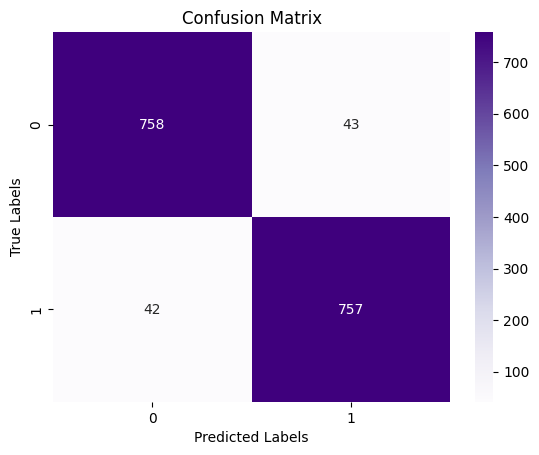

In [ ]:
from sklearn.metrics import confusion_matrix

#confusion matrix on training set
y_pred = svm_tfidf.predict(X_train_tfidf)
conf_matrix = confusion_matrix(y_train_tfidf, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

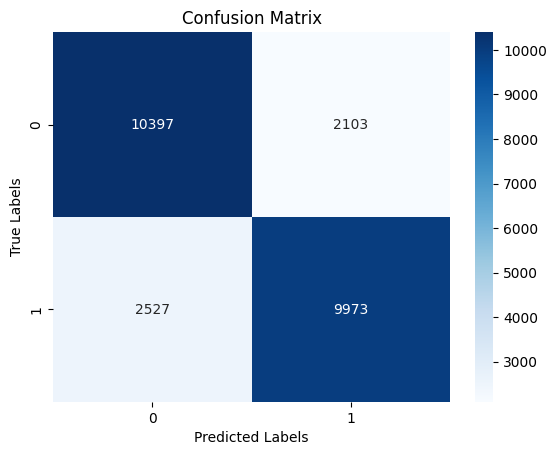

In [ ]:
from sklearn.metrics import confusion_matrix

# confusion matrix on test set
conf_matrix = confusion_matrix(y, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Bussiness Recommendation

* The model can be deployed for processing movie reviews
* The accuracy of the model can be improved by training more complex, deep learning models
* It would be better to train the model on huge corpus of text for better preformance
* Contenxt aware modes such as transformers and Large language models can be used for better classification of sentiments


## Conclusion

* we have chosen two different datasets for training and testing the dataset
* We have cleaned the data, removed stopwrods, applied word lemmatizations
* We have utlized TF-IDF for word embeddings
* We have scaled our embeddings with MinMaxScaler
* We have reduced dimensionality using PCA
* We have chosen SVM classifier for building the model
* Our model is not overfitted on the training dataset
* Our model is performing well with 81% accuracy on the test dataset